**Connecting to google drive where the dataset is stored**

In [1]:
from google.colab import  drive
import os
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CAPSTONE//
#DATA_PATH = '/content/drive/MyDrive/CAPSTONE/ArticlesText.csv'
#pickles_folder = os.listdir(DATA_PATH)

Mounted at /content/drive
/content/drive/MyDrive/CAPSTONE


Importing neccessary libraries

In [2]:
import numpy as np 
import pandas as pd 
import os, json
import glob
import csv

Creating a dataframe containing values from dataset.

In [3]:
import io
#read_covidarticles = pd.read_csv(io.BytesIO(uploaded['ArticlesText.csv']))
read_covidarticles = pd.read_csv("Articles2500_SPACY.csv")
read_covidarticles

,Unnamed: 0,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text,processed_text
0,0,mumnjs2f,0ed44b0a01f65058a03e6db7c213860c8e1df18d,Medline; PMC; WHO,A case of severe autoimmune hemolytic anemia a...,10.1111/ijlh.13653,PMC8444646,34258873.0,no-cc,SARS-CoV-2 mRNA vaccine made by Pfizer and Bio...,...,Int J Lab Hematol,NaN,NaN,NaN,document_parses/pdf_json/0ed44b0a01f65058a03e6...,document_parses/pmc_json/PMC8444646.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34258873/;...,235821948.0,"| C A S E REP ORT\n\nThe patient, in this case...",c s e rep ort patient case 84-year-old man vie...
1,1,4zqt300p,ab9dafa8ec6532d6e45321b05db03bafae9d518b,Medline; PMC,Network Meta‐Analysis Comparing the Efficacy o...,10.1002/jpen.1030,PMC7166391,29388676.0,no-cc,BACKGROUND: This study aims to compare placebo...,...,JPEN J Parenter Enteral Nutr,NaN,NaN,NaN,document_parses/pdf_json/ab9dafa8ec6532d6e4532...,document_parses/pmc_json/PMC7166391.xml.json,https://doi.org/10.1002/jpen.1030; https://www...,46645417.0,Introduction\n\nInfants and children are most ...,introduction infants child susceptible bronchi...
2,2,d1t4w239,df10e2e92ab95cff91dbc6e7e2af3f341f057fe2,PMC,Flower Mimics Roll Out Multicolored Carpets to...,10.3390/insects12121097,PMC8706000,34940185.0,cc-by,"SIMPLE SUMMARY: Besides being a nuisance, hous...",...,Insects,NaN,NaN,NaN,document_parses/pdf_json/df10e2e92ab95cff91dbc...,document_parses/pmc_json/PMC8706000.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,Introduction\n\nHouse flies (Diptera: Muscidae...,introduction house fly diptera muscidae musca ...
3,3,3dvoppu2,6b509f54616ea76ec7d67d61c8ba9d4d0327ad65,PMC,Pathways of protein sorting and membrane traff...,10.1016/1043-4682(92)90020-v,PMC7128811,1457777.0,no-cc,Recent results have provided increasing eviden...,...,Semin Cell Biol,NaN,NaN,NaN,document_parses/pdf_json/6b509f54616ea76ec7d67...,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,\n\nSTUDIES CARRIED out in the 1960s and 70s d...,studies carried 1960s 70s demonstrate endoplas...
4,4,f1b4tr2t,06a61285ecbc70a5c6e9aa99d30fb79d5ccff2bf,Medline; PMC,Isolation and identification of leukocyte popu...,10.1177/0271678x211028496,PMC8795221,34250820.0,cc-by-nc,Using standard techniques during mechanical th...,...,J Cereb Blood Flow Metab,NaN,NaN,NaN,document_parses/pdf_json/06a61285ecbc70a5c6e9a...,document_parses/pmc_json/PMC8795221.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34250820/;...,235798131.0,"Introduction\n\nSince 2015, mechanical thrombe...",introduction 2015 mechanical thrombectomy stan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,nvplahsq,36cc23945a882e974b7886dda3d38867c518f708,Medline; PMC,Behavior of Children during Dental Care with R...,10.3390/dj9080089,PMC8393898,34436001.0,cc-by,Background: The establishment of the dental da...,...,Dent J (Basel),NaN,NaN,NaN,document_parses/pdf_json/36cc23945a882e974b788...,document_parses/pmc_json/PMC8393898.xml.json,https://doi.org/10.3390/dj9080089; https://www...,237307376.0,"Introduction\n\nThe dental dam, designed in 18...",introduction dental dam design 1864 dr. stanfo...
2496,2496,u0688uoh,44415c473aa8d0e1553db60c31dbd888c3aff569,Elsevier; PMC,Multi-zonal transmission dynamics of pandemic ...,10.1016/j.jnlssr.2020.11.002,PMC7690943,NaN,els-covid,"At the end of 2019, the novel coronavirus (COV...",...,NaN,NaN,NaN,NaN,document_parses/pdf_json/44415c473aa8d0e1553db...,NaN,https://api.elsevier.com/content/article/pii/S...,227171568.0,"Introduction\n\nIn early December 2019, the ou...",introduction early december 2019 outbreak larg...
2497,2497,ujufj0gq,342db8fcabc0719adf5f98c9e25058eecd306ac5,Medline; PMC; WHO,Improvement in the Cognitive Aspects of Cultur...,10.3390/ijerph18137102,PMC8297341,34281035.0,cc-by,Universities are providing short-term overseas...,...,Int J Environ Res Public H

**NLP PROCESS**

In [4]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer

import spacy

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

Customizing STOPWORDS

In [11]:
stop_words=stopwords.words('english')
additional_words = ['not','they','would','shall','might','could','v','qpr','snp','"','– ','did','said','says','say','want','know',
                    'doi', 'preprint', 'copyright', 'org', 'https', 'et', 'al', 'author', 'figure', 'table',
    'rights', 'reserved', 'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI',
    '-PRON-', 'usually', 'et', 'al','time','level', 'group','model','well','one','addition','de','la','may','day','und','der','da','also','de',
    r'\usepackage{amsbsy', r'\usepackage{amsfonts', r'\usepackage{mathrsfs', r'\usepackage{amssymb', r'\usepackage{wasysym','different','may',
    r'\setlength{\oddsidemargin}{-69pt',  r'\usepackage{upgreek', r'\documentclass[12pt]{minimal','protein','cell','number','used','high','group',
    'model','using','figure','il','reported','table','time','datum','numb','include','low','provide','patient','study','covid','good']
for aw in additional_words:
  stop_words.append(aw)
lemmatizer = WordNetLemmatizer()
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
import seaborn as sns
import re,random
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import string


In [7]:
def lowercase_all(s):
  return s.lower()

def replace_unnecessary_chars(s):
    text = lowercase_all(s)
    text = re.sub('\w*\d\w*','', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r"\n\\x",'', text)
    return text

def remove_stop_words(s,stopwords):
    words = [word for word in s.split() if word.lower() not in stopwords]
    modern_txt = " ".join(words)
    return modern_txt

def text_cleaning(s,stopwords):
    lowered = lowercase_all(s)
    cleaned = remove_stop_words(lowered,stopwords)
    final_text = replace_unnecessary_chars(cleaned)
    return final_text

def sentence_tokenization(s):
    return nltk.tokenize.sent_tokenize(s)

def word_tokenization(s):
    return nltk.tokenize.word_tokenize(s)

def lemmatization_process(s):
    token_words = word_tokenization(s)
    sentence_lemma = []
    for word in token_words:
      sentence_lemma.append(lemmatizer.lemmatize(word))
    return " ".join(sentence_lemma)
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations




In [13]:
def eda_process_steps(col):
  read_covidarticles[col] = read_covidarticles[col].apply(lambda x : text_cleaning(x,stop_words))
  read_covidarticles[col] = read_covidarticles[col].apply(lambda x : lemmatization_process(x))
  return read_covidarticles[col]

read_covidarticles['processed_text'] = eda_process_steps('processed_text').copy()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

**TOP 20 WORDS**

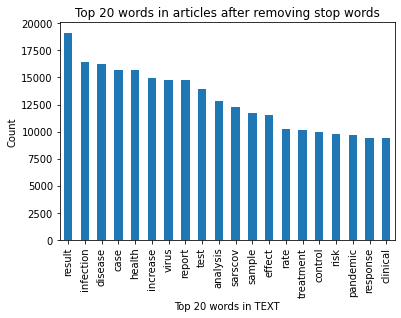

In [14]:
common_words = get_top_n_words(read_covidarticles['processed_text'], 20)
df2 = pd.DataFrame(common_words, columns = ['Reviewtext' , 'count'])

df2.groupby('Reviewtext').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Top 20 words in TEXT')
plt.title('Top 20 words in articles after removing stop words')
plt.show()

**CREATING WORD CLOUD**

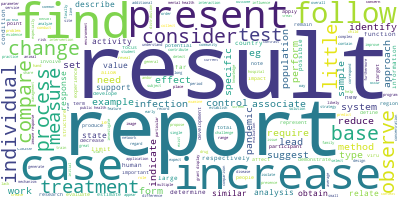

In [15]:
from wordcloud import WordCloud
long_string = ','.join(list(read_covidarticles['processed_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

**TOPIC MODELLING**

I will be creating 10 topics using LDA. So 2500 articles will be divided in amongst these 10 topics

In [16]:
def sent_to_words(sentences):
    for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = read_covidarticles.processed_text.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['rep', 'ort', 'case', 'yearold', 'man', 'vietnam', 'war', 'veteran', 'greekturkish', 'descent', 'medical', 'history', 'significant', 'major', 'prostate', 'cancer', 'status', 'post', 'remote', 'prostatectomy', 'colon', 'cancer', 'status', 'post', 'remote', 'laparoscopic', 'right', 'hemicolectomy', 'patent', 'anastomosis']


In [17]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 5), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 3), (18, 1), (19, 3), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


In [18]:
from pprint import pprint
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"virus" + 0.004*"case" + 0.004*"report" + 0.004*"infection" + '
  '0.003*"test" + 0.003*"result" + 0.003*"disease" + 0.003*"health" + '
  '0.003*"activity" + 0.003*"effect"'),
 (1,
  '0.004*"infection" + 0.004*"result" + 0.004*"disease" + 0.004*"health" + '
  '0.004*"increase" + 0.003*"sample" + 0.003*"report" + 0.003*"find" + '
  '0.003*"sarscov" + 0.003*"case"'),
 (2,
  '0.005*"result" + 0.004*"disease" + 0.004*"health" + 0.004*"case" + '
  '0.004*"increase" + 0.003*"infection" + 0.003*"effect" + 0.003*"research" + '
  '0.003*"human" + 0.003*"virus"'),
 (3,
  '0.004*"health" + 0.004*"report" + 0.004*"disease" + 0.004*"case" + '
  '0.004*"infection" + 0.004*"result" + 0.003*"vaccine" + 0.003*"analysis" + '
  '0.003*"risk" + 0.002*"control"'),
 (4,
  '0.005*"infection" + 0.005*"test" + 0.004*"sarscov" + 0.004*"result" + '
  '0.004*"disease" + 0.003*"increase" + 0.003*"report" + 0.003*"sample" + '
  '0.003*"case" + 0.003*"health"'),
 (5,
  '0.004*"health" + 0.004*"test" + 

In [19]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()

   
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
       
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Percentage Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.8434,"case, result, virus, sarscov, infection, sampl...","[rep, ort, case, yearold, man, vietnam, war, v..."
1,1,6.0,0.3056,"case, result, virus, sarscov, infection, sampl...","[introduction, infant, child, susceptible, bro..."
2,2,7.0,0.8186,"increase, report, health, case, result, sarsco...","[introduction, house, fly, diptera, muscidae, ..."
3,3,6.0,0.9704,"case, result, virus, sarscov, infection, sampl...","[carried, demonstrate, endoplasmic, reticulum,..."
4,4,6.0,0.9860,"case, result, virus, sarscov, infection, sampl...","[introduction, mechanical, thrombectomy, stand..."
5,5,6.0,0.4351,"case, result, virus, sarscov, infection, sampl...","[systematic, review, aim, protocol, registrati..."
6,6,6.0,0.9097,"case, result, virus, sarscov, infection, sampl...","[introduction, extracellular, vesicle, ev, nat..."
7,7,8.0,0.9685,"case, health, increase, disease, infection, vi...","[introduction, familial, fh, common, acquire, ..."
8,8,6.0,0.4676,"case, result, virus, sarscov, infection, sampl...","[introduction, coronavirus, disease, outbreak,..."
9,9,4.0,0.6391,"infection, test, sarscov, result, disease, inc...","[introduction, novel, coronavirus, sarscov, id..."


**Document Statistics**

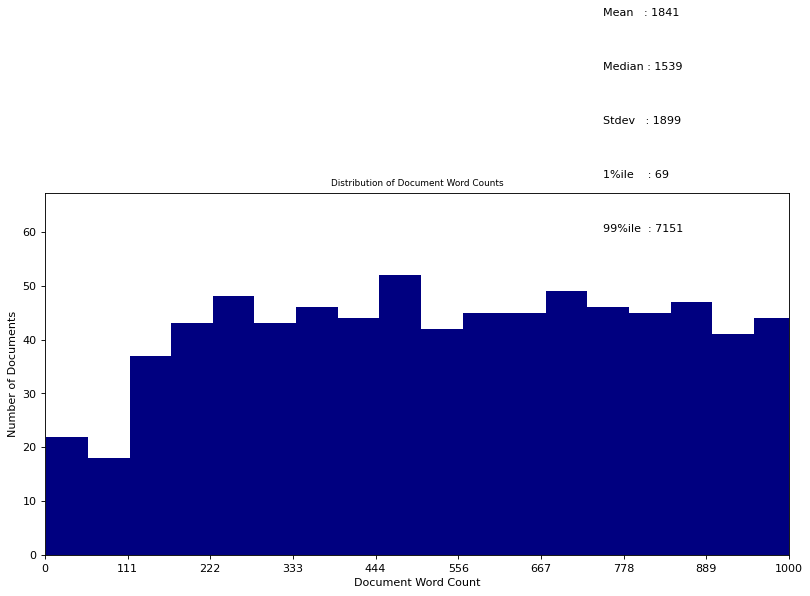

In [20]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

plt.figure(figsize=(12,6), dpi=80)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=4)
plt.xticks(np.linspace(0,1000,10))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=8))
plt.show()

**WORDCLOUD TOPICWISE**

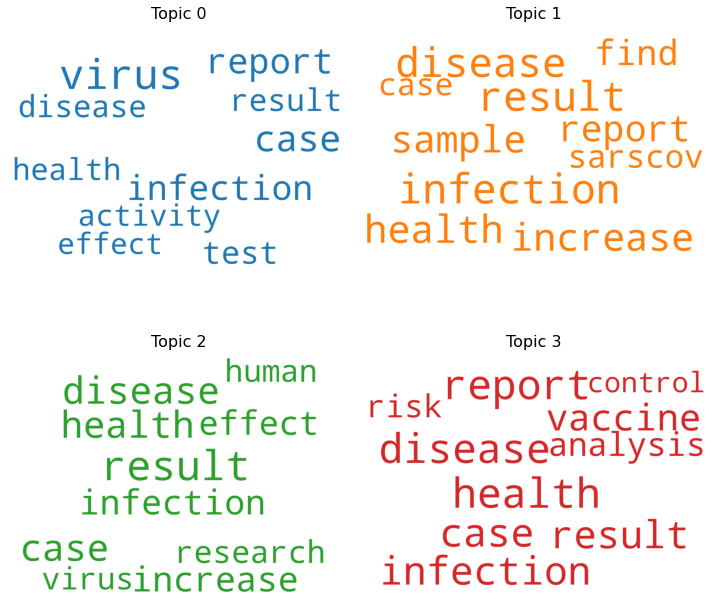

In [21]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**IMPORTANCE OF TOPIC KEYWORDS**

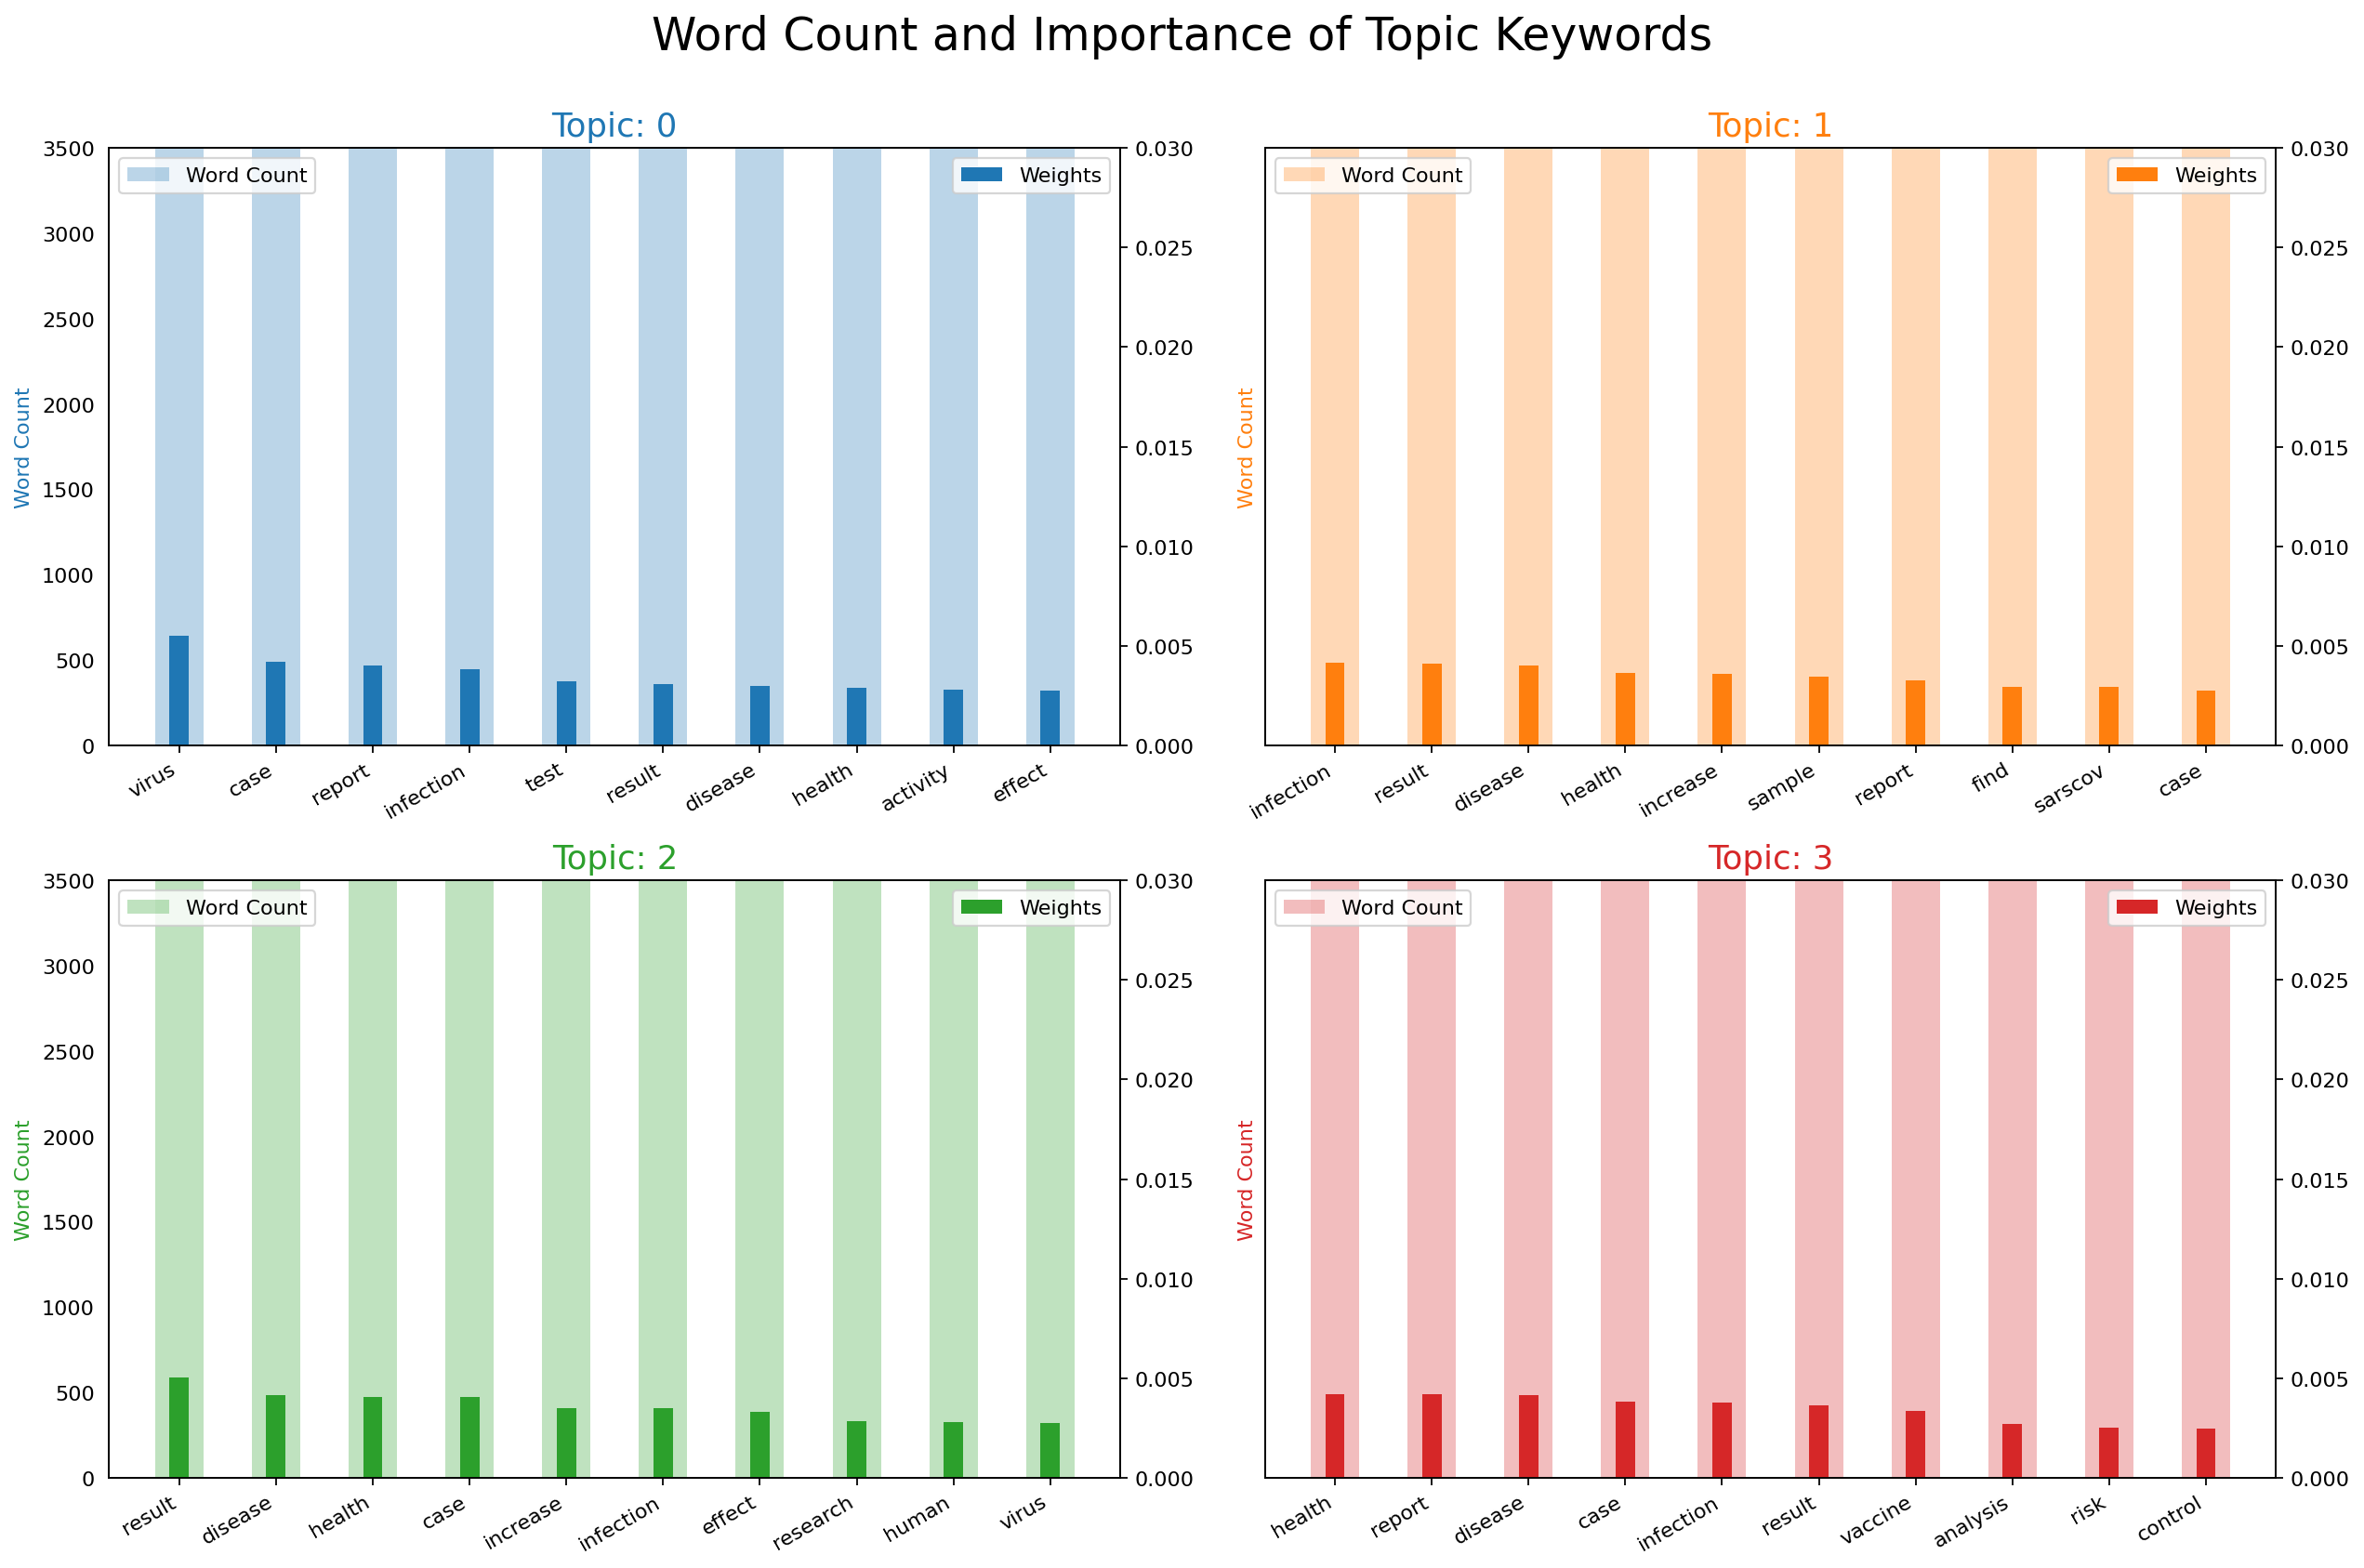

In [22]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

**INTERACTIVE TOPIC VISUALIZATION**

In [23]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [24]:
!pip install pyLDAvis


     |████████████████████████████████| 1.7 MB 22.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1297f1faf871e377ad30894186091e28e4adce6be553c80a56d1359fbe4e56fe
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [25]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [26]:
# Reference - https://medium.com/@nqabell89/visualizing-unsupervised-text-classification-output-with-pyldavis-370c1784ed58

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.012678  0.004255       1        1  18.116728
6      0.009272  0.002929       2        1  16.636392
2     -0.003489 -0.005599       3        1  14.076131
0      0.002156  0.010186       4        1  11.655531
4      0.005071  0.000548       5        1  10.529003
1     -0.000343  0.003295       6        1   7.794843
8     -0.006437 -0.001325       7        1   6.486396
7      0.003018 -0.006139       8        1   5.610448
3      0.000484 -0.007167       9        1   5.163163
9      0.002945 -0.000983      10        1   3.931367, topic_info=           Term          Freq         Total Category  logprob  loglift
401      health  16496.000000  16496.000000  Default  30.0000  30.0000
179      report  14189.000000  14189.000000  Default  29.0000  29.0000
209     vaccine   7766.000000   7766.000000  Default  28.0000  28.0000
31         case  16037.000000  16037.000000  Default  27.0000  27.0000
1909  infection  16119.000000  16119.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
2068       risk    341.076851   9286.519538  Topic10  -6.2737  -0.0680
564      result    437.935977  18139.385399  Topic10  -6.0238  -0.4876
558    research    339.972875  10031.925304  Topic10  -6.2770  -0.1485
578      sample    350.622659  12018.320996  Topic10  -6.2461  -0.2983
668    activity    317.827411   8029.725478  Topic10  -6.3443   0.0068

[955 rows x 6 columns], token_table=        Topic      Freq     Term
term                            
134533      1  0.466715     aapi
134533      2  0.043755     aapi
134533      3  0.393791     aapi
134533      4  0.036462     aapi
134533      5  0.007292     aapi
...       ...       ...      ...
133820      6  0.246922    zwaan
89987       1  0.298706       þb
89987       3  0.298706       þb
89987       7  0.298706       þb
69947       9  0.426620  βfactor

[4647 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 3, 1, 5, 2, 9, 8, 4, 10])